In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
test_data[:10,4]




array([0.679, 0.547, 0.515, 0.605, 0.449, 0.585, 0.484, 0.426, 0.581,
       0.58 ])

Нормализация данных

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
test_data -= mean

std = train_data.std(axis=0)

train_data /=std
test_data /=std

Определение модели, создадим функцию, возвращающую модель

In [30]:
from keras import models, layers

def build_model():
    model= models.Sequential()
    model.add(layers.Dense(32, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(16, activation='sigmoid'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Обучение и перекрестная проверка модели по К блокам


In [38]:
import numpy as np

k=2
num_val_samples = len(train_data) // k
num_epoch = 400
all_mae_histories=[]

for i in range(k):
    print('processing fold №', i)
    val_data=train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples], 
         train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples], 
         train_targets[(i+1)*num_val_samples:]],axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data,partial_train_targets,
                        validation_data=(val_data,val_targets),
                        epochs=num_epoch, batch_size=8, verbose=0)
    
    all_mae_histories.append(history.history['val_mae'])




processing fold № 0
processing fold № 1


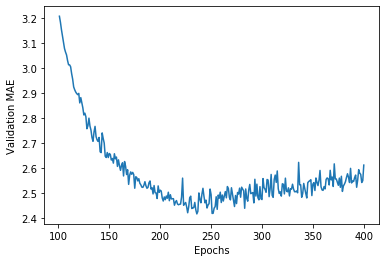

In [39]:
import matplotlib.pyplot as plt
average_mae_history= [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epoch)]
delay=100
plt.plot(range(delay+1,len(average_mae_history)+1),average_mae_history[delay:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [41]:
model=build_model()
model.fit(train_data,train_targets,epochs=220, batch_size=8, verbose=0)

test_mse, test_mae = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 740us/step - loss: 16.8263 - mae: 2.3935
